In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv("Admission_Predict_graduate.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [65]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [66]:
df.shape

(500, 9)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [68]:
df.duplicated().sum()

0

In [69]:
df.drop(columns=["Serial No."],inplace=True)

In [70]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [72]:
X=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [73]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [74]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
X.shape,y.shape,X_train.shape,X_test.shape,y.shape

((500, 7), (500,), (400, 7), (100, 7), (500,))

#### if we have know about upper and lower bound then we can use minmaxscaler

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [78]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [79]:
X_train_scaled

array([[0.62      , 0.67857143, 0.5       , ..., 0.71428571, 0.65064103,
        1.        ],
       [0.52      , 0.67857143, 0.75      , ..., 1.        , 0.55769231,
        0.        ],
       [0.26      , 0.35714286, 0.5       , ..., 0.42857143, 0.54487179,
        0.        ],
       ...,
       [0.24      , 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.38      , 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [80]:
X_test_scaled

array([[ 0.88      ,  0.85714286,  0.75      ,  0.75      ,  0.57142857,
         0.87820513,  1.        ],
       [ 0.48      ,  0.57142857,  0.75      ,  0.875     ,  0.71428571,
         0.71794872,  1.        ],
       [ 0.5       ,  0.46428571,  0.25      ,  0.25      ,  0.28571429,
         0.2724359 ,  0.        ],
       [ 0.44      ,  0.60714286,  0.5       ,  0.5       ,  0.42857143,
         0.60576923,  0.        ],
       [ 0.72      ,  0.71428571,  0.5       ,  0.625     ,  0.42857143,
         0.72115385,  1.        ],
       [ 0.78      ,  0.67857143,  0.75      ,  0.875     ,  0.71428571,
         0.77884615,  1.        ],
       [ 0.        ,  0.28571429,  0.        ,  0.125     ,  0.14285714,
         0.24358974,  0.        ],
       [ 0.22      ,  0.5       ,  0.75      ,  0.375     ,  0.42857143,
         0.53525641,  0.        ],
       [ 0.56      ,  0.60714286,  0.5       ,  0.625     ,  0.71428571,
         0.77564103,  1.        ],
       [ 0.6       ,  0.7142

In [81]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [82]:
model=Sequential()

In [83]:
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="linear"))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [85]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [86]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 17ms/step - loss: 0.3081 - val_loss: 0.2760
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2228 - val_loss: 0.1927
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1505 - val_loss: 0.1255
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0951 - val_loss: 0.0743
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0543 - val_loss: 0.0397
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0288 - val_loss: 0.0197
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0155 - val_loss: 0.0109
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - val_loss: 0.0083
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0079
Epoch 11

In [87]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [88]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8034447996762036

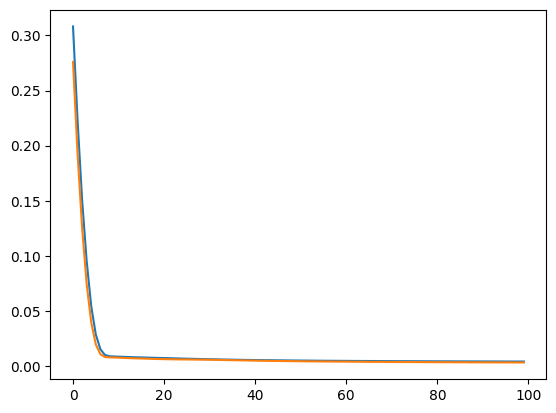

In [90]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])